In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib as plt 
import seaborn as sn
from statistics import mode, multimode

First data table called POS 

In [6]:
df = pd.read_csv(r'..\POS_CASH_balance.csv')

In [7]:
POS_Updated = df.rename(columns = {"NAME_CONTRACT_STATUS": "CONTRACT_STATUS",
                     "CNT_INSTALMENT_FUTURE": "PENDING_INSTALLMENTS",
                     "SK_DPD": "DAYS_PAST_DUE",
                     "SK_DPD_DEF": "DPD_LOW_LOANS",
                    "CNT_INSTALMENT":"OLD_PREV_TERMS"})

In [8]:
POS_Updated.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,OLD_PREV_TERMS,PENDING_INSTALLMENTS,CONTRACT_STATUS,DAYS_PAST_DUE,DPD_LOW_LOANS
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


Check for how many entries are under the same ID 

In [9]:
POS_Updated[POS_Updated['SK_ID_PREV']==1715348]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,OLD_PREV_TERMS,PENDING_INSTALLMENTS,CONTRACT_STATUS,DAYS_PAST_DUE,DPD_LOW_LOANS
1,1715348,367990,-33,36.0,35.0,Active,0,0
314363,1715348,367990,-18,36.0,20.0,Active,0,0
562444,1715348,367990,-21,36.0,23.0,Active,0,0
682460,1715348,367990,-34,36.0,36.0,Active,0,0
1824052,1715348,367990,-26,36.0,28.0,Active,0,0
1845104,1715348,367990,-19,36.0,21.0,Active,0,0
1846916,1715348,367990,-23,36.0,25.0,Active,0,0
3193464,1715348,367990,-25,36.0,27.0,Active,0,0
3210170,1715348,367990,-27,36.0,29.0,Active,0,0
3337866,1715348,367990,-30,36.0,32.0,Active,0,0


# Amount of data 

In [10]:
POS_Updated.shape

(10001358, 8)

In [11]:
# determine how much missing data is there 
POS_Updated.isnull().sum()

SK_ID_PREV                  0
SK_ID_CURR                  0
MONTHS_BALANCE              0
OLD_PREV_TERMS          26071
PENDING_INSTALLMENTS    26087
CONTRACT_STATUS             0
DAYS_PAST_DUE               0
DPD_LOW_LOANS               0
dtype: int64

In [12]:
# fill in that missing data with 0 

POS_Updated.fillna(0, inplace = True)

In [13]:
# check again 
for col in POS_Updated.columns:
    pct_missing = np.mean(POS_Updated[col].isnull())
    print('{} - {}%'.format(col, (pct_missing*100)))
"This produces a list below showing the percentage of missing values for each of the features."

SK_ID_PREV - 0.0%
SK_ID_CURR - 0.0%
MONTHS_BALANCE - 0.0%
OLD_PREV_TERMS - 0.0%
PENDING_INSTALLMENTS - 0.0%
CONTRACT_STATUS - 0.0%
DAYS_PAST_DUE - 0.0%
DPD_LOW_LOANS - 0.0%


'This produces a list below showing the percentage of missing values for each of the features.'

Check the correlation matrix to find patterns 

<AxesSubplot:>

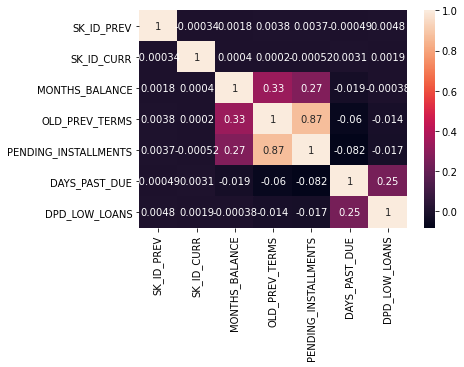

In [14]:
matrix_table = POS_Updated.corr()
sn.heatmap(matrix_table, annot=True)

In [12]:
 # from here we can see that old prev terms and pending intallments have a high correlation 

Covert multiple entries into 1 under the same old ID 

1. For old prev terms take the mode of it  
2. Pending installments sum the all up 
3. For contract Status cross check to see what is the status at the lowest months balance based on the ID
4. For Days past due sum the all up 
5. DPD low loans also sum the all up 
6. Drop the column months balance as it is highly correlated with old prev terms

In [15]:
POS_Updated[POS_Updated['SK_ID_PREV']==1484443]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,OLD_PREV_TERMS,PENDING_INSTALLMENTS,CONTRACT_STATUS,DAYS_PAST_DUE,DPD_LOW_LOANS
2909264,1484443,100250,-12,12.0,12.0,Signed,0,0
5813929,1484443,100250,-4,12.0,4.0,Active,0,0
5817205,1484443,100250,-6,12.0,6.0,Active,0,0
6665286,1484443,100250,-3,12.0,3.0,Active,0,0
6812119,1484443,100250,-7,12.0,7.0,Active,0,0
7307119,1484443,100250,-5,12.0,5.0,Active,0,0
7360241,1484443,100250,-2,12.0,2.0,Active,0,0
8980249,1484443,100250,-11,12.0,11.0,Active,0,0
9231285,1484443,100250,-10,12.0,11.0,Active,0,0
9339695,1484443,100250,-8,12.0,9.0,Active,0,0


In [16]:
POS_Updated_Final = POS_Updated.groupby('SK_ID_CURR').agg({"MONTHS_BALANCE": "max",'OLD_PREV_TERMS':'mean',
'DAYS_PAST_DUE': 'sum',
'DPD_LOW_LOANS': 'sum',
'PENDING_INSTALLMENTS': 'sum', "CONTRACT_STATUS": "count"}).reset_index()

In [17]:
POS_Updated_Final.shape

(337252, 7)

In [ ]:
## Extarcting the final status for given SK_ID_PREV

In [56]:
len(status)

524

In [18]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df_POS = spark.read.csv('../POS_CASH_balance.csv', header = True, inferSchema = True)
df_POS.printSchema()

root
 |-- SK_ID_PREV: integer (nullable = true)
 |-- SK_ID_CURR: integer (nullable = true)
 |-- MONTHS_BALANCE: integer (nullable = true)
 |-- CNT_INSTALMENT: double (nullable = true)
 |-- CNT_INSTALMENT_FUTURE: double (nullable = true)
 |-- NAME_CONTRACT_STATUS: string (nullable = true)
 |-- SK_DPD: integer (nullable = true)
 |-- SK_DPD_DEF: integer (nullable = true)



In [28]:
df_POS_pd =  df_POS.sort("MONTHS_BALANCE", ascending=False).dropDuplicates(['SK_ID_CURR']).toPandas()

In [29]:
df_POS_final = pd.merge(POS_Updated_Final, df_POS_pd[['SK_ID_CURR','NAME_CONTRACT_STATUS']], how='left', on=['SK_ID_CURR']) 

In [30]:
df_POS_final.shape

(337252, 8)

In [27]:
df_POS_pd.shape


(936325, 8)

In [26]:
POS_Updated_Final.shape

(337252, 7)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
289289,2413549,348018,-1,12.0,3.0,Active,0,0
206155,2543105,283376,-12,4.0,0.0,Completed,0,0
310057,1377053,106259,-32,10.0,0.0,Completed,0,0
6986,1277620,159441,-9,6.0,0.0,Completed,0,0
239807,1135199,278721,-1,6.0,2.0,Active,0,0
245955,2552089,149103,-23,6.0,0.0,Completed,0,0
220623,2152699,100962,-51,8.0,0.0,Completed,0,0
193587,1551482,449373,-2,6.0,0.0,Completed,0,0
202922,1110588,313078,-6,2.0,0.0,Completed,0,0
197461,1058343,216669,-2,12.0,10.0,Active,0,0


In [53]:
temp_df = POS_Updated[(POS_Updated['SK_ID_PREV']==id_)]
temp_df

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,OLD_PREV_TERMS,PENDING_INSTALLMENTS,CONTRACT_STATUS,DAYS_PAST_DUE,DPD_LOW_LOANS
93473,2685766,413216,-17,12.0,10.0,Active,0,0
1231971,2685766,413216,-14,12.0,7.0,Active,0,0
6718748,2685766,413216,-13,12.0,6.0,Active,0,0
7250944,2685766,413216,-11,8.0,0.0,Completed,0,0
7747274,2685766,413216,-12,12.0,5.0,Active,0,0
8111648,2685766,413216,-18,12.0,11.0,Active,0,0
8769362,2685766,413216,-16,12.0,9.0,Active,0,0
8838302,2685766,413216,-15,12.0,8.0,Active,0,0
9704618,2685766,413216,-19,12.0,12.0,Active,0,0


In [ ]:
POS_Updated_Final_1 = pd.merge(POS_Updated_Final,
                 new_df,
                 on='SK_ID_PREV', 
                 how='outer')


In [ ]:
POS_Updated_Final_1.head()

In [ ]:
new_df.shape

In [46]:
POS_Updated['SK_ID_PREV'].unique()

array([1803195, 1715348, 1784872, ..., 2452932, 1980876, 2308284],
      dtype=int64)

In [ ]:
POS_Updated['SK_ID_PREV'].nunique()

<ipython-input-50-66a53396aca6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  POS_Updated[(POS_Updated['SK_ID_PREV']==id_)][ (POS_Updated['MONTHS_BALANCE']== max(POS_Updated[POS_Updated['SK_ID_PREV']==id_]['MONTHS_BALANCE']))]['CONTRACT_STATUS'].values[0]


'Active'

Questions:
1. How to take the mode of a colum in pandas 
2. How to cross match the contract status and last day of months intallmentes 


In [16]:
POS_Updated_Final.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,OLD_PREV_TERMS,DAYS_PAST_DUE,DPD_LOW_LOANS,PENDING_INSTALLMENTS,CONTRACT_STATUS
0,1000001,158271,-8,12.0,0,0,23.0,3
1,1000002,101962,-50,6.0,0,0,10.0,5
2,1000003,252457,-1,12.0,0,0,42.0,4
3,1000004,260094,-22,10.0,0,0,49.0,8
4,1000005,176456,-46,10.0,0,0,55.0,11


In [65]:
POS_Updated_Final[POS_Updated_Final['SK_ID_PREV']==1673007]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,OLD_PREV_TERMS,DAYS_PAST_DUE,DPD_LOW_LOANS,PENDING_INSTALLMENTS,CONTRACT_STATUS
359065,1673007,228354,-7,23.958333,0,0,299.0,24


In [63]:
POS_Updated_Final.shape

(936325, 8)

After finishing the table export it to a new csv file with the changes

In [34]:
POS_Updated_Final.to_csv("POS_v2.csv", index = None)